##Jose Luis Soto Soto - 2181583

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import matplotlib.pyplot as plt


#Lasso Problem
Para aplicar el ADMM al problema de lasso se debe transformar el problema a:


$$\begin{matrix}
\underset{x,v}{\text{ minimize }} ||y-Hx||^2_2 + λ ||v||_1
\\
\end{matrix}
$$
y por lo tanto, su aumented lagrangian es:


$$
F(x,v,u) = ||y - Hx||^2_2 + λ ||v||_1 + u^T(x-v) +\frac{ρ}{2}||x-v||^2_2
$$

Los pasos que vamos a seguir en las iteraciones vendrian orientadas a minimizar el lagrangiano aumentado de las siguiente manera:


$$
x_{k+1} =\underset{x}{\text{ argmin }} F(x, v_k, u_k)
$$

$$
v_{k+1} = \underset{x}{\text{ argmin }} F(x_{k+1}, v_k, u_k)
$$

$$
u_{k+1} = u_k + x_{k+1} - v_{k+1}
$$



Siendo que estos valores se pueden obtener derivando e igualando a 0, se obtiene:

$$\begin{matrix}
x_{k+1} = (H^TH+ρI)^{-1}(H^Ty+ρ(v_k-u_k))\\
v_{k+1} = s_{λ/ρ}(x_{k+1}+u_k)\\
u_{k+1} = u_k + x_{k+1} -v_{k+1}
\end{matrix}
$$
Donde 
$$
S_{K}(a)= \left\{ \begin{array}{lcc}
             a_i - k &   si  & a_i > k \\
             \\ 0 &  si & |a| \leq k \\
             \\ a+k &  si  & a < k
             \end{array}
   \right.
$$

In [2]:
import urllib.request

urllib.request.urlretrieve("https://i.postimg.cc/BnFpFxHt/image.png",
"imagen.png")



('imagen.png', <http.client.HTTPMessage at 0x7f6596572a10>)

In [3]:
from PIL import Image
image = Image.open("imagen.png")
image = image.resize((64,64),Image.ANTIALIAS)
image.save(fp="Rimage.png")

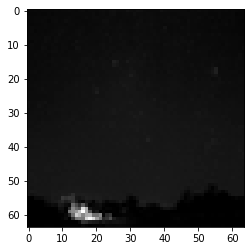

array([0.02184118, 0.02576235, 0.02851138, ..., 0.        , 0.00044706,
       0.00044706], dtype=float32)

In [4]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Rimage.png')

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')
plt.show()
imgGray
x = np.concatenate(imgGray)
x


$$
y=Hx
$$

where H ∈ R
m×n
is a random uniform matrix. You can normalize it by columns.

Under this, we try to employ the ADMM for the following cases:

$$
H ∈ \left( R \right) ^{nxm} 
$$
$$
 where: m = n
$$

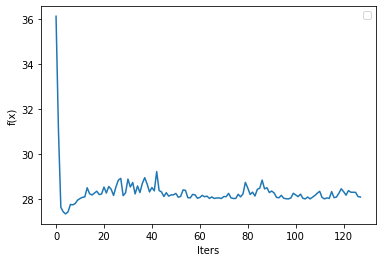

In [5]:
n,m = 4096,4096
H = tf.random.uniform(shape=[n,m],minval=0)
y = tf.random.uniform(shape=[n,],minval=0)
x = np.concatenate(imgGray)
ro = 0.3
lamb = 0.1
#X has  m elements

def f(x):
  return tf.norm(np.dot(H, x) - y,2)**2 + lamb*tf.norm(x,1)


iter = 128
x_vals = []
f_vals = []

mat = tf.linalg.inv(tf.transpose(H)@H + ro*np.identity(m))

v = tf.random.uniform(shape=[m,],minval=0)
u = tf.random.uniform(shape=[m,],minval=0)

for _ in range(0,iter,1):
  x_1 = np.dot(mat,(np.dot(tf.transpose(H),y) + ro*(v-u)))
  v_1 = tfp.math.soft_threshold(x_1 + u,lamb/ro)
  u_1 = u + x_1 - v_1
  
  x = x_1
  v = v_1
  u = u_1

  f_vals.append(f(x))

plt.plot(range(0,iter,1),f_vals)
plt.xlabel("Iters")
plt.ylabel("f(x)")
plt.legend()

In [6]:
a = np.dot(H, x) - y
res = a.numpy()

imgRes = res.reshape(64,-1)
plt.figure(figsize=(14,14))

plt.subplot(131)
plt.title('Imagen resultante del ADMM')
plt.imshow(imgRes)


R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgRes = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.subplot(132)
plt.title('Imagen resultante en escala de gris')
plt.imshow(imgRes, cmap='gray')



e = tf.random.normal(shape=[n,], mean=0.0, stddev=0.01,)
noisy = a.numpy() + e.numpy()
noisy = noisy.reshape(64,-1)
plt.subplot(133)
plt.title('Imagen con ruido')
plt.imshow(noisy)
plt.show()



$$
H ∈ \left( R \right) ^{nxm} 
$$
$$
 where: n > m 
$$

In [7]:
n,m = 4096,3025
H = tf.random.uniform(shape=[n,m],minval=0)
y = tf.random.uniform(shape=[n,],minval=0)
x = np.concatenate(imgGray)
ro = 0.3
lamb = 0.1
#X has  m elements

print(x)
def f(x):
  
  return tf.norm(np.dot(H, x) - y,2)**2 + lamb*tf.norm(x,1)


iter = 100
x_vals = []
f_vals = []

mat = tf.linalg.inv(tf.transpose(H)@H + ro*np.identity(m))

v = tf.random.uniform(shape=[m,],minval=0)
u = tf.random.uniform(shape=[m,],minval=0)

for _ in range(0,iter,1):
  x_1 = np.dot(mat,(np.dot(tf.transpose(H),y) + ro*(v-u)))
  v_1 = tfp.math.soft_threshold(x_1 + u,lamb/ro)
  u_1 = u + x_1 - v_1
  
  x = x_1
  v = v_1
  u = u_1

  f_vals.append(f(x))

plt.plot(range(0,iter,1),f_vals)
plt.xlabel("Iters")
plt.ylabel("f(x)")
plt.legend()

[0.02184118 0.02576235 0.02851138 ... 0.         0.00044706 0.00044706]


In [8]:
a1 = np.dot(H, x) - y
res1 = a1.numpy()

imgRes1 = res1.reshape(64,-1)
plt.figure(figsize=(14,14))

plt.subplot(131)
plt.title('Imagen resultante del ADMM')
plt.imshow(imgRes1)


R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgRes1 = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.subplot(132)
plt.title('Imagen resultante en escala de gris')
plt.imshow(imgRes1, cmap='gray')



e = tf.random.normal(shape=[n,], mean=0.0, stddev=0.01,)
noisy1 = a1.numpy() + e.numpy()
noisy1 = noisy1.reshape(64,-1)
plt.subplot(133)
plt.title('Imagen con ruido')
plt.imshow(noisy1)
plt.show()



$$
H ∈ \left( R \right) ^{nxm} 
$$
$$
 where: n < m 
$$

In [9]:
n,m = 4096,5041
H = tf.random.uniform(shape=[n,m],minval=0)
y = tf.random.uniform(shape=[n,],minval=0)
x = np.concatenate(imgGray)
ro = 0.3
lamb = 0.1
#X has  m elements
x = imgGray
def f(x):
  return tf.norm(np.dot(H, x) - y,2)**2 + lamb*tf.norm(x,1)


iter = 100
x_vals = []
f_vals = []

mat = tf.linalg.inv(tf.transpose(H)@H + ro*np.identity(m))

v = tf.random.uniform(shape=[m,],minval=0)
u = tf.random.uniform(shape=[m,],minval=0)

for _ in range(0,iter,1):
  x_1 = np.dot(mat,(np.dot(tf.transpose(H),y) + ro*(v-u)))
  v_1 = tfp.math.soft_threshold(x_1 + u,lamb/ro)
  u_1 = u + x_1 - v_1
  
  x = x_1
  v = v_1
  u = u_1

  f_vals.append(f(x))

plt.plot(range(0,iter,1),f_vals)
plt.xlabel("Iters")
plt.ylabel("f(x)")
plt.legend()

In [10]:
a2 = np.dot(H, x) - y
res2 = a2.numpy()

imgRes2 = res2.reshape(64,-1)
plt.figure(figsize=(14,14))

plt.subplot(131)
plt.title('Imagen resultante del ADMM')
plt.imshow(imgRes2)


R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgRes2 = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.subplot(132)
plt.title('Imagen resultante en escala de gris')
plt.imshow(imgRes2, cmap='gray')



e = tf.random.normal(shape=[n,], mean=0.0, stddev=0.01,)
noisy2 = a2.numpy() + e.numpy()
noisy2 = noisy2.reshape(64,-1)
plt.subplot(133)
plt.title('Imagen con ruido')
plt.imshow(noisy2)
plt.show()

